<a href="https://colab.research.google.com/github/Jrojas743/Ciencia-de-datos/blob/main/taller_2_introducci_n_a_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANÁLISIS EXPLORATORIO DE DATOS - EDA
"Conjunto de técnicas estadísticas cuyo objetivo es explorar, describir y resumir la naturaleza de los datos y comprender las relaciones existentes entre las variables de interés, maximizando la comprensión del conjunto de datos".

El EDA, de acuoerdo a Wickman y Çetinkaya-Rundel y Grolemund (2023) propone seguir los siguientes pasos:
1. **Realizar un análisis descriptivo de las variables**, con el fin de obtener una idea representativa de los datos.
2. **Re-ajustar tipos de variables** para que sean consistentes en el momento de realizar posteriores operaciones.
3. **Detectar y tratar datos ausentes**, que nos permitirá procesar adecuadamente las variables numéricas.
4. **Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos.
5. **Realizar un examen numérico y gráfico de las relaciones entre variables analizadas para determinar el grado de correlación entre ellas**

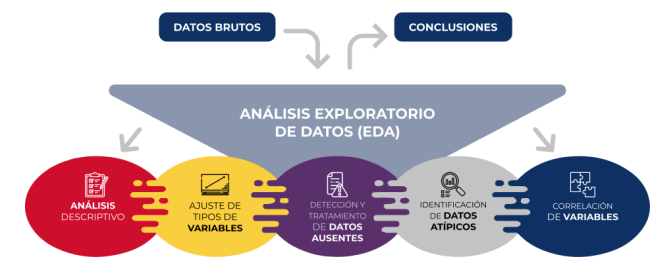

##TALLER
Para ello, realizaremos un ejercicio en el cuál se analizará estudiaremos el dataset de titanic con el fin de poder responder a la siguiente pregunta: Podría Jack sobrevivir al hundimiento del TITANIC (de acuerdo a lo arrojado por los datos).

Para ello, descargue el dataset de titanic y realice un análisis descriptivo de todos los datos posibles del dataset (emplee los conceptos ya aprendidos en el primer corte.

###ANÁLISIS DESCRIPTIVO

In [ ]:
#Realice aquí su análisis descriptivo y emita sus conclusiones. Emplee todas las gráficas necesarias para poder emitir conclusiones con respecto a la tripulación del titanic.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('titanic.csv')

Cómo podemos llenar los datos nulos?

Los datos disponibles son suficientes para generar un modelo mínimo viable?

### AJUSTES DE VARIABLES
Observemos el dataset de TITANIC:
* La presentación de todas las variables es la adecuada? Si su respuesta es si, qué tipo de variable posee la feature Age?
AGE es una variable de tipo float. Queremos que sea de tipo entero. Genere un nuevo dataset con la característica AGE de tipo entero. Así mismo, revise que las características Survived y Pclass sean numéricas.

### DETECCIÓN Y TRATAMIENTO DE DATOS AUSENTES
Como se pudo observar, el dataset de titanic posee una cantidad de (llenar aquí con la información) datos nulos, los cuáles deben ser tratados para un posterior entendimiento de los datos. Ejecute las siguientes líneas de código para arreglar el dataset y explica los resultados obtenidos.

##Importe de librerias por error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic-train.csv to titanic-train (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded["titanic-train (1).csv"]))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
total

In [ ]:
df.isnull().count()

In [ ]:
porcentajes=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
porcentajes

In [ ]:
datos_perdidos=pd.concat([total,porcentajes],axis=1,keys=['Total','Porcentaje'])
datos_perdidos

In [ ]:
import numpy as np
def plot_learning_curve(estimator,title,X,y,xlim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Puntuación de validación")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Puntuación de entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Puntuación de validación")

    plt.legend(loc="best")
    return plt


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

##Valores Nulos

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
porcentajes = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
datos_perdidos = pd.concat([total, porcentajes], axis=1, keys=['Total', 'Porcentaje'])
print("VALORES NULOS EN EL DATASET:\n")
print(datos_perdidos)

VALORES NULOS EN EL DATASET:

             Total  Porcentaje
Cabin          687    0.771044
Age            177    0.198653
Embarked         2    0.002245
PassengerId      0    0.000000
Name             0    0.000000
Pclass           0    0.000000
Survived         0    0.000000
Sex              0    0.000000
Parch            0    0.000000
SibSp            0    0.000000
Fare             0    0.000000
Ticket           0    0.000000


In [ ]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#Extrae el título del nombre completo

In [ ]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
# Reemplaza títulos raros
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Mapea a números
df['Title'] = df['Title'].map({
    'Mr': 1,
    'Miss': 2,
    'Mrs': 3,
    'Master': 4,
    'Rare': 5
})

print(df['Title'].isnull().sum())

0


Para imputar los valores ausentes en la columna Age, se utilizó un enfoque basado en la media agrupada por Pclass y Sex. Esto permite asignar edades más coherentes y contextualizadas, considerando que las edades pueden variar significativamente entre clases sociales y género. En una segunda estrategia aún más refinada, se extrajo el título (Mr, Mrs, Miss, etc.) desde el nombre del pasajero, y se utilizó la media de edad por título para rellenar los valores nulos, lo cual resulta en una imputación más precisa y realista.

In [ ]:
print(df['Title'].unique())

[1 3 2 4 5]


In [ ]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df = df.drop(columns=["Cabin", "Ticket", "PassengerId", "Name"])

<ipython-input-10-26e055714809>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [ ]:
label_sex = LabelEncoder()
label_embarked = LabelEncoder()
df["Sex"] = label_sex.fit_transform(df["Sex"])
df["Embarked"] = label_embarked.fit_transform(df["Embarked"])

##Variables de entrada y objetivo

In [ ]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

Nos aseguramos de que todos los valores sean numericos.

In [ ]:
print(X.dtypes)
print(X.head())

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
Title         int64
dtype: object
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0       3    1  22.0      1      0   7.2500         2      1
1       1    0  38.0      1      0  71.2833         0      3
2       3    0  26.0      0      0   7.9250         2      2
3       1    0  35.0      1      0  53.1000         2      3
4       3    1  35.0      0      0   8.0500         2      1


In [ ]:
df['Age'] = df.groupby(['Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
X['Age'] = df.groupby(['Pclass', 'Title'])['Age'].transform(lambda x: x.fillna(x.mean()))


##Funcion de la curva de aprendizaje

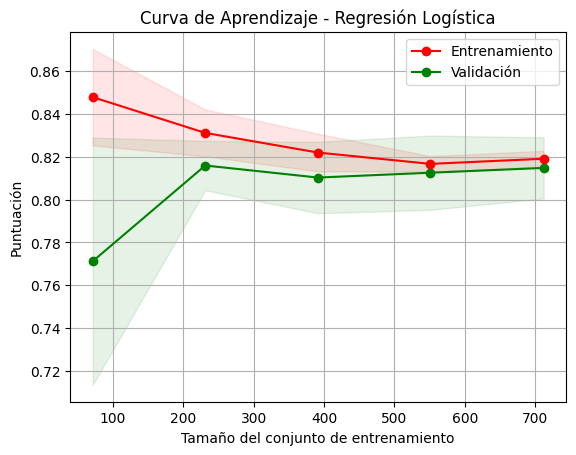

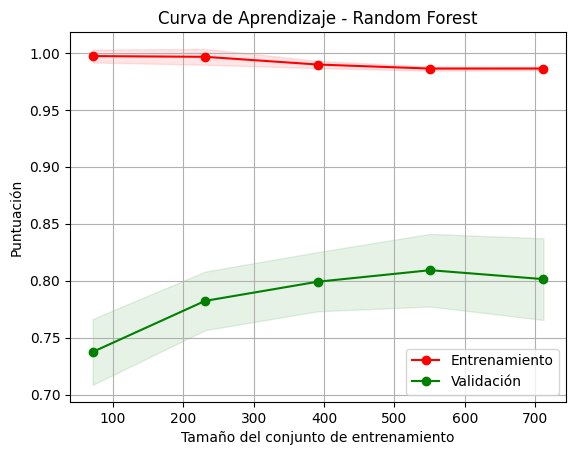

In [ ]:
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel("Puntuación")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")
    plt.legend(loc="best")
    plt.show()


lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100)


plot_learning_curve(lr, "Curva de Aprendizaje - Regresión Logística", X, y)
plot_learning_curve(rf, "Curva de Aprendizaje - Random Forest", X, y)

Explique línea por línea qué está haciendo la función plot_learning_curve (responda preguntas como, qué tipo de datos solicita, qué otros valores se pueden usar, cuál es su uso, etc.). También explique la gráfica obtenida.

El resultado de esta actividad debe subirse a GITHUB el día 7 de abril/2025 a las 5:00pm.
**Actividades subidas en la franja de 5:01pm a 11:59pm será evaluado sobre 4.0.**

**Actividades subidas después del 7 de abril pero antes de la siguiente clase serán evaluadas sobre 3.0.**


##Para investigar:
Formule una estrategia que permita llenar los datos nulos del dataset y empléelo. Ejemplo: cómo podría llenar los datos nulos de edades?